<a href="https://colab.research.google.com/github/Shailendra079/CodeClause_Project_Covid_Analysis/blob/main/Covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_india.csv to covid_19_india.csv


In [ ]:
data = pd.read_csv("covid_19_india.csv")
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [ ]:
data.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
data.drop(["Sno","Time","ConfirmedIndianNational", "ConfirmedForeignNational"],inplace=True, axis=1)

In [ ]:
data.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [ ]:
data['Active_Cases']=data['Confirmed']-(data['Cured']-data['Deaths'])
data.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
18105,2021-08-11,Telangana,638410,3831,650353,15774
18106,2021-08-11,Tripura,77811,773,80660,3622
18107,2021-08-11,Uttarakhand,334650,7368,342462,15180
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,46095
18109,2021-08-11,West Bengal,1506532,18252,1534999,46719


In [ ]:
statewise = pd.pivot_table(data, values=['Confirmed','Deaths','Cured'],index= 'State/UnionTerritory' , aggfunc = max)

In [ ]:
statewise['Recovery Rate'] = statewise ['Cured']*100/ statewise['Confirmed']

In [ ]:
statewise['Mortality Rate'] = statewise ['Deaths']*100/ statewise['Confirmed']

In [ ]:
statewise = statewise.sort_values( by = 'Confirmed', ascending = False)

In [ ]:
statewise.style.background_gradient(cmap="cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


In [ ]:
Top_10_active_cases_states = data.groupby(by = 'State/UnionTerritory').max()[['Active_Cases','Date']].sort_values(by ='Active_Cases', ascending= False).reset_index()

In [ ]:
Top_10_active_cases_states.head()

,State/UnionTerritory,Active_Cases,Date
0,Maharashtra,829727,2021-08-11
1,Karnataka,648383,2021-08-11
2,Kerala,458370,2021-08-11
3,Maharashtra***,359438,2021-07-21
4,Tamil Nadu,357936,2021-08-11


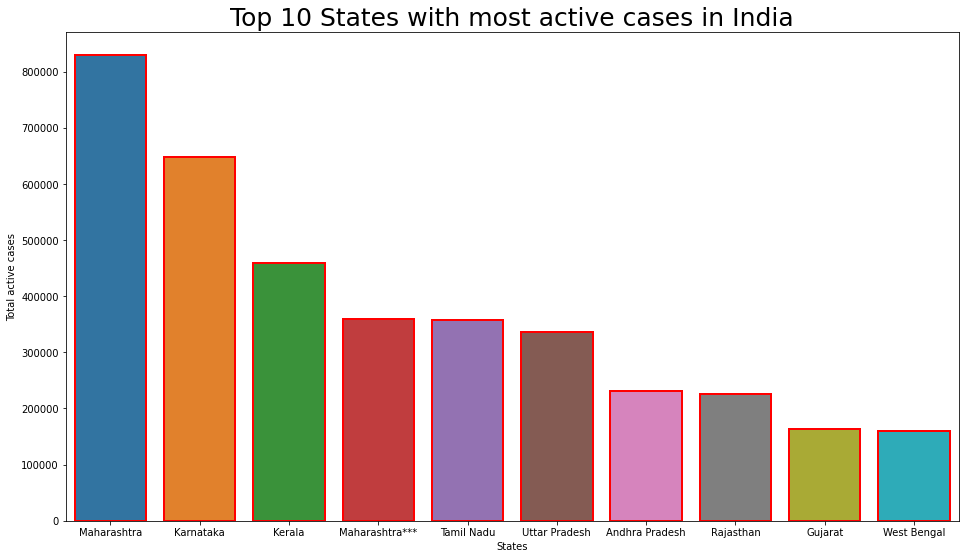

In [ ]:
fig = plt.figure(figsize=(16,9))
plt.title("Top 10 States with most active cases in India",size =25)
ax= sns.barplot(data = Top_10_active_cases_states.iloc[:10],y = 'Active_Cases',x='State/UnionTerritory', linewidth=2, edgecolor='red')

plt.xlabel("States")
plt.ylabel("Total active cases")
plt.show()

In [ ]:
Top_10_highest_deaths_states= data.groupby(by = 'State/UnionTerritory').max()[['Deaths','Date']].sort_values(by ='Deaths', ascending = False).reset_index()

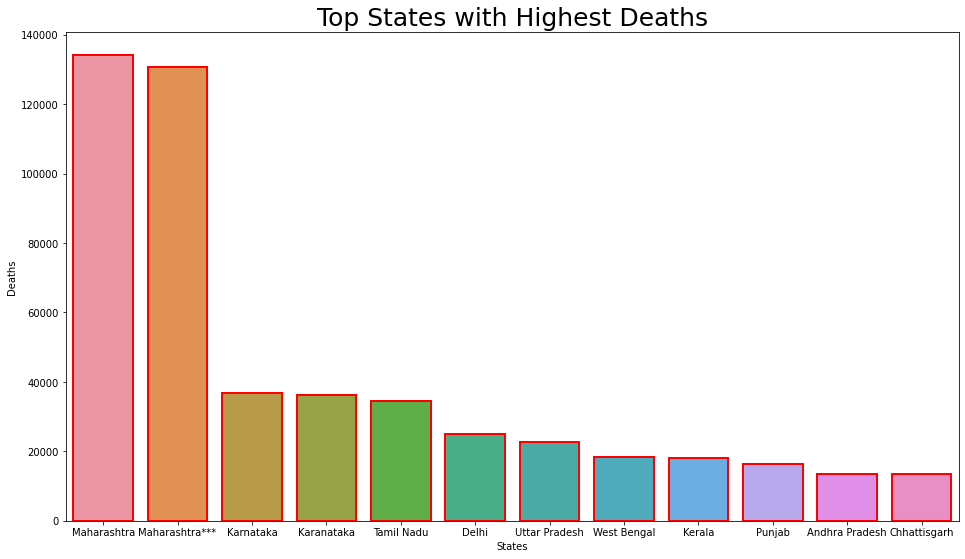

In [ ]:
fig = plt.figure(figsize=(16,9))
plt.title("Top States with Highest Deaths", size=25)
ax= sns.barplot(data = Top_10_highest_deaths_states.iloc[:12], x='State/UnionTerritory',y='Deaths',linewidth=2, edgecolor='red')
plt.xlabel('States')
plt.ylabel('Deaths')
plt.show()

##Statewise vaccine analysis

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving covid_vaccine_statewise.csv.zip to covid_vaccine_statewise.csv.zip


In [ ]:
vaccine_data = pd.read_csv("covid_vaccine_statewise.csv.zip")
vaccine_data.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [ ]:
vaccine_data.rename(columns={'Updated On':'Vaccine_date'},inplace=True)

In [ ]:
vaccine_data.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [ ]:
vaccine_data.isnull().sum()

Vaccine_date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [ ]:
vaccination = vaccine_data.drop(columns=['Sputnik V (Doses Administered)', 'AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'], axis=1)

In [ ]:
vaccination.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [ ]:
male= vaccination["Male(Individuals Vaccinated)"].sum()
female= vaccination["Female(Individuals Vaccinated)"].sum()
px.pie(names=["Male","Female"], values=[male,female],title="Male and Female Vaccination")

In [ ]:
vaccine = vaccine_data[vaccine_data.State!='India']

In [ ]:
max_vac=vaccine.groupby('State')['Total Individuals Vaccinated'].sum().to_frame('Total Individuals Vaccinated')
max_vac=max_vac.sort_values('Total Individuals Vaccinated', ascending=False)[:5]
max_vac

,Total Individuals Vaccinated
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


In [ ]:
max_vac.rename(columns={'Total Individuals Vaccinated':'Total'}, inplace=True)

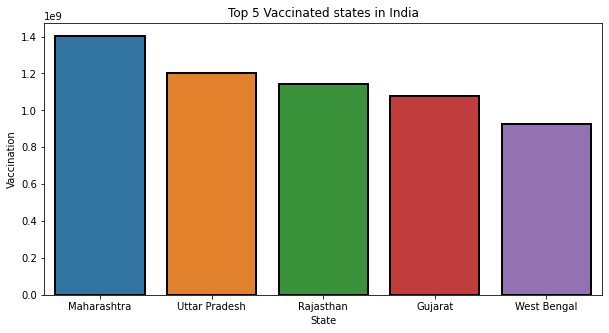

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.title("Top 5 Vaccinated states in India", size=12)

x = sns.barplot(data= max_vac.iloc[:10],x=max_vac.index ,y=max_vac.Total,linewidth=2,edgecolor='black')
plt.xlabel('State')
plt.ylabel('Vaccination')
plt.show()

In [ ]:
min_vax=vaccine.groupby('State')['Total Individuals Vaccinated'].sum().to_frame('Total Individuals Vaccinated')
min_vax=min_vax.sort_values('Total Individuals Vaccinated',ascending=True)[:5]
min_vax

,Total Individuals Vaccinated
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


In [ ]:
min_vax.rename(columns={'Total Individuals Vaccinated':'Total'}, inplace=True)

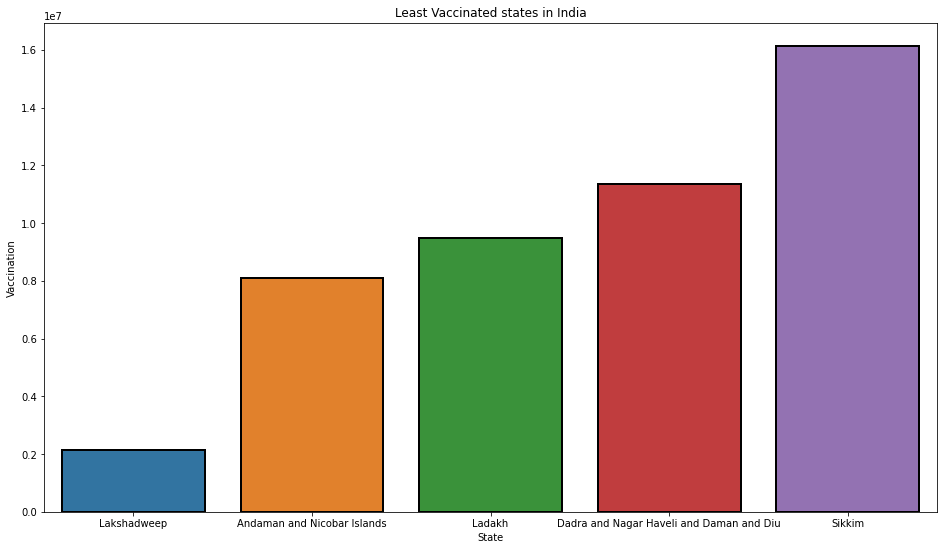

In [ ]:
fig=plt.figure(figsize=(16,9))
plt.title("Least Vaccinated states in India", size=12)

x=sns.barplot(data=min_vax.iloc[:10], x= min_vax.index,y=min_vax.Total , linewidth=2,edgecolor='black')
plt.xlabel('State')
plt.ylabel('Vaccination')
plt.show()